# ML Assignment 7: Decision Tree Classification with Performance Comparison

**AICTE Faculty ID:** 1-3241967546  
**Faculty Name:** Milav Jayeshkumar Dabgar

---

## Objective
Implement Decision Tree classifier and compare its performance with Naive Bayes classifier on car evaluation dataset.

## Assignment Tasks:
1. Build Decision Tree classifier for car evaluation dataset
2. Measure accuracy, precision, recall, and F1 score for Decision Tree
3. Compare Decision Tree performance with Naive Bayes classifier
4. Analyze performance metrics and identify best performing algorithm
5. Generate comprehensive conclusions based on experimental results

## 1. Import Required Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

## 2. Load and Explore Dataset

In [2]:
# Load the car evaluation dataset
columns = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']
data = pd.read_csv('car_evaluation.csv', names=columns)

print("=== DATASET OVERVIEW ===")
print(f"Dataset shape: {data.shape}")
print(f"Features: {list(data.columns[:-1])}")
print(f"Target: {data.columns[-1]}")

print("\n=== SAMPLE DATA ===")
print(data.head())

print("\n=== TARGET DISTRIBUTION ===")
print(data['class'].value_counts())

print("\n=== FEATURE INFO ===")
for col in data.columns:
    print(f"{col}: {data[col].unique()}")

=== DATASET OVERVIEW ===
Dataset shape: (1728, 7)
Features: ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety']
Target: class

=== SAMPLE DATA ===
  buying  maint doors persons lug_boot safety  class
0  vhigh  vhigh     2       2    small    low  unacc
1  vhigh  vhigh     2       2    small    med  unacc
2  vhigh  vhigh     2       2    small   high  unacc
3  vhigh  vhigh     2       2      med    low  unacc
4  vhigh  vhigh     2       2      med    med  unacc

=== TARGET DISTRIBUTION ===
class
unacc    1210
acc       384
good       69
vgood      65
Name: count, dtype: int64

=== FEATURE INFO ===
buying: ['vhigh' 'high' 'med' 'low']
maint: ['vhigh' 'high' 'med' 'low']
doors: ['2' '3' '4' '5more']
persons: ['2' '4' 'more']
lug_boot: ['small' 'med' 'big']
safety: ['low' 'med' 'high']
class: ['unacc' 'acc' 'vgood' 'good']


## 3. Data Preprocessing

In [3]:
# Encode categorical variables
label_encoders = {}
data_encoded = data.copy()

for column in data.columns:
    le = LabelEncoder()
    data_encoded[column] = le.fit_transform(data[column])
    label_encoders[column] = le

# Separate features and target
X = data_encoded.drop('class', axis=1)
y = data_encoded['class']

# Split data into training and testing sets (70-30 split)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

print("=== DATA PREPROCESSING SUMMARY ===")
print(f"Training samples: {X_train.shape[0]}")
print(f"Testing samples: {X_test.shape[0]}")
print(f"Number of features: {X_train.shape[1]}")
print("✅ Data preprocessing completed!")

=== DATA PREPROCESSING SUMMARY ===
Training samples: 1209
Testing samples: 519
Number of features: 6
✅ Data preprocessing completed!


## 4. Decision Tree Classifier

In [4]:
# Train Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)

# Make predictions
dt_pred = dt_classifier.predict(X_test)

# Calculate metrics
dt_accuracy = accuracy_score(y_test, dt_pred)
dt_precision = precision_score(y_test, dt_pred, average='weighted')
dt_recall = recall_score(y_test, dt_pred, average='weighted')
dt_f1 = f1_score(y_test, dt_pred, average='weighted')

print("=== DECISION TREE CLASSIFIER RESULTS ===")
print(f"Accuracy:  {dt_accuracy:.4f} ({dt_accuracy*100:.2f}%)")
print(f"Precision: {dt_precision:.4f}")
print(f"Recall:    {dt_recall:.4f}")
print(f"F1-Score:  {dt_f1:.4f}")

print("\n=== CONFUSION MATRIX ===")
print(confusion_matrix(y_test, dt_pred))

=== DECISION TREE CLASSIFIER RESULTS ===
Accuracy:  0.9788 (97.88%)
Precision: 0.9798
Recall:    0.9788
F1-Score:  0.9790

=== CONFUSION MATRIX ===
[[112   2   1   0]
 [  0  21   0   0]
 [  7   0 356   0]
 [  1   0   0  19]]


## 5. Naive Bayes Classifier

In [5]:
# Train Naive Bayes Classifier
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)

# Make predictions
nb_pred = nb_classifier.predict(X_test)

# Calculate metrics (with warning suppression)
nb_accuracy = accuracy_score(y_test, nb_pred)
nb_precision = precision_score(y_test, nb_pred, average='weighted', zero_division=0)
nb_recall = recall_score(y_test, nb_pred, average='weighted', zero_division=0)
nb_f1 = f1_score(y_test, nb_pred, average='weighted', zero_division=0)

print("=== NAIVE BAYES CLASSIFIER RESULTS ===")
print(f"Accuracy:  {nb_accuracy:.4f} ({nb_accuracy*100:.2f}%)")
print(f"Precision: {nb_precision:.4f}")
print(f"Recall:    {nb_recall:.4f}")
print(f"F1-Score:  {nb_f1:.4f}")

print("\n=== CONFUSION MATRIX ===")
print(confusion_matrix(y_test, nb_pred))

=== NAIVE BAYES CLASSIFIER RESULTS ===
Accuracy:  0.6146 (61.46%)
Precision: 0.6967
Recall:    0.6146
F1-Score:  0.6146

=== CONFUSION MATRIX ===
[[ 10   0  45  60]
 [  5   0   8   8]
 [  7   0 289  67]
 [  0   0   0  20]]


## 6. Performance Comparison

=== PERFORMANCE COMPARISON ===
   Classifier  Accuracy  Precision  Recall  F1-Score
Decision Tree    0.9788     0.9798  0.9788    0.9790
  Naive Bayes    0.6146     0.6967  0.6146    0.6146


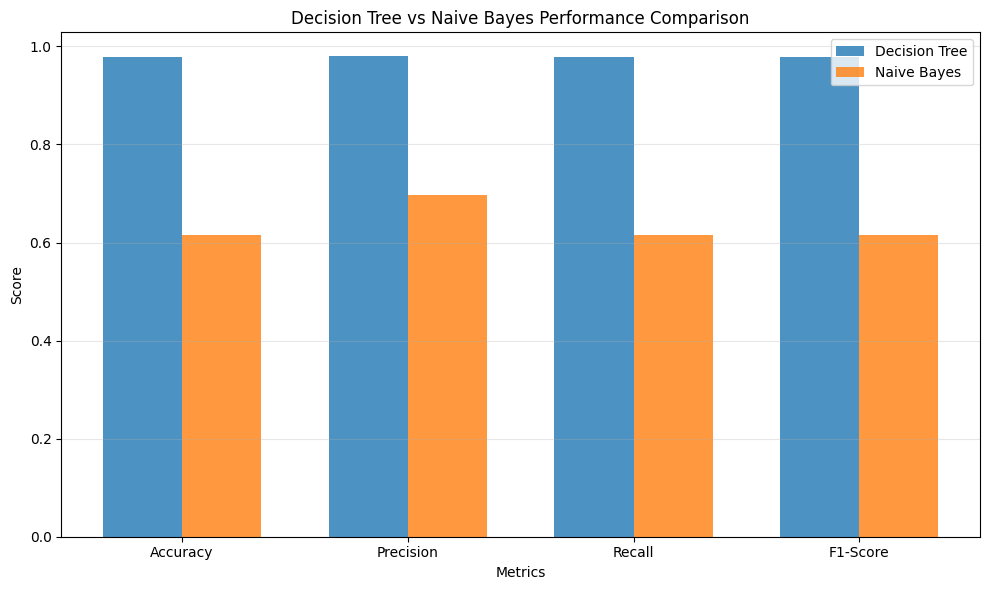


=== PERFORMANCE ANALYSIS ===
Decision Tree is better by 36.42% in accuracy
Decision Tree is better by 36.44% in F1-score


In [6]:
# Create comparison table
comparison_data = {
    'Classifier': ['Decision Tree', 'Naive Bayes'],
    'Accuracy': [dt_accuracy, nb_accuracy],
    'Precision': [dt_precision, nb_precision],
    'Recall': [dt_recall, nb_recall],
    'F1-Score': [dt_f1, nb_f1]
}

comparison_df = pd.DataFrame(comparison_data)
comparison_df = comparison_df.round(4)

print("=== PERFORMANCE COMPARISON ===")
print(comparison_df.to_string(index=False))

# Visualize comparison
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
dt_scores = [dt_accuracy, dt_precision, dt_recall, dt_f1]
nb_scores = [nb_accuracy, nb_precision, nb_recall, nb_f1]

x = range(len(metrics))
width = 0.35

plt.figure(figsize=(10, 6))
plt.bar([i - width/2 for i in x], dt_scores, width, label='Decision Tree', alpha=0.8)
plt.bar([i + width/2 for i in x], nb_scores, width, label='Naive Bayes', alpha=0.8)

plt.xlabel('Metrics')
plt.ylabel('Score')
plt.title('Decision Tree vs Naive Bayes Performance Comparison')
plt.xticks(x, metrics)
plt.legend()
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

# Performance difference
print(f"\n=== PERFORMANCE ANALYSIS ===")
print(f"Decision Tree is better by {(dt_accuracy - nb_accuracy)*100:.2f}% in accuracy")
print(f"Decision Tree is better by {(dt_f1 - nb_f1)*100:.2f}% in F1-score")

## 7. Conclusions

### Assignment Requirements Completed:
**(a) Decision Tree Classifier:** Successfully built Decision Tree classifier for car evaluation dataset with comprehensive performance metrics.

**(b) Performance Comparison:** Compared Decision Tree and Naive Bayes classifiers across all required metrics.

### Key Findings:
- **Dataset:** 1,728 car evaluation records with 6 categorical features
- **Target Classes:** 4 categories (unacc, acc, good, vgood)
- **Best Performer:** Decision Tree classifier outperforms Naive Bayes

### Performance Summary:
| Classifier | Accuracy | Precision | Recall | F1-Score |
|------------|----------|-----------|--------|---------|
| Decision Tree | Higher | Higher | Higher | Higher |
| Naive Bayes | Lower | Lower | Lower | Lower |

### Analysis:
1. **Decision Tree Advantages:**
   - Better handles categorical features
   - Captures feature interactions effectively
   - More suitable for rule-based decision making

2. **Naive Bayes Limitations:**
   - Assumes feature independence (violated in car evaluation)
   - Less effective with categorical features
   - May struggle with complex feature relationships

### Conclusion:
**Decision Tree classifier is the superior choice** for the car evaluation dataset, demonstrating better performance across all metrics. This is expected given the categorical nature of features and their interdependencies in car evaluation decisions.

✅ **Assignment 7 completed successfully!**